<a href="https://colab.research.google.com/github/danadler-dev/MDPI-BA-Paper/blob/main/ABC_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import hashlib

def compact_symbols(symbol_dict):
    """
    Compacts the keys of a dictionary to make them more readable while retaining the counts.
    Symbols with repeating characters or subgroups are compacted.

    Args:
        symbol_dict (dict): A dictionary with symbols as keys and counts as values.

    Returns:
        dict: A new dictionary with compacted keys and the same counts.
    """
    def compact(symbol):
        # Compact repeated characters (e.g., "AAA" -> "A3")
        compacted = ""
        count = 1
        for i in range(1, len(symbol)):
            if symbol[i] == symbol[i - 1]:
                count += 1
            else:
                compacted += f"{symbol[i - 1]}{count if count > 1 else ''}"
                count = 1
        compacted += f"{symbol[-1]}{count if count > 1 else ''}"

        # Compact repeated substrings (e.g., "ABABAB" -> "(AB)3")
        def compact_subgroups(s, max_passes=2):
            pattern = re.compile(r"(.+?)\1{1,}")  # Match repeated substrings
            passes = 0
            while passes < max_passes:
                match = pattern.search(s)
                if not match:
                    break
                repeated, repeats = match.group(1), len(match.group(0)) // len(match.group(1))
                s = s.replace(match.group(0), f"({repeated}){repeats}")
                passes += 1
            return s

        compacted = compact_subgroups(compacted)
        return compacted

    def shorten_symbol(symbol, max_length=15):
        """
        Shortens a symbol using a hash if its length exceeds max_length.
        """
        if len(symbol) > max_length:
            # Use a hash-based identifier
            short_hash = hashlib.md5(symbol.encode()).hexdigest()[:6]  # First 6 hex digits
            return f"H{short_hash}"
        return symbol

    # Compact and shorten symbols
    compacted_dict = {}
    for symbol, count in symbol_dict.items():
        compacted = compact(symbol)
        compacted = shorten_symbol(compacted)
        compacted_dict[compacted] = count

    return compacted_dict

Unconstrained System:


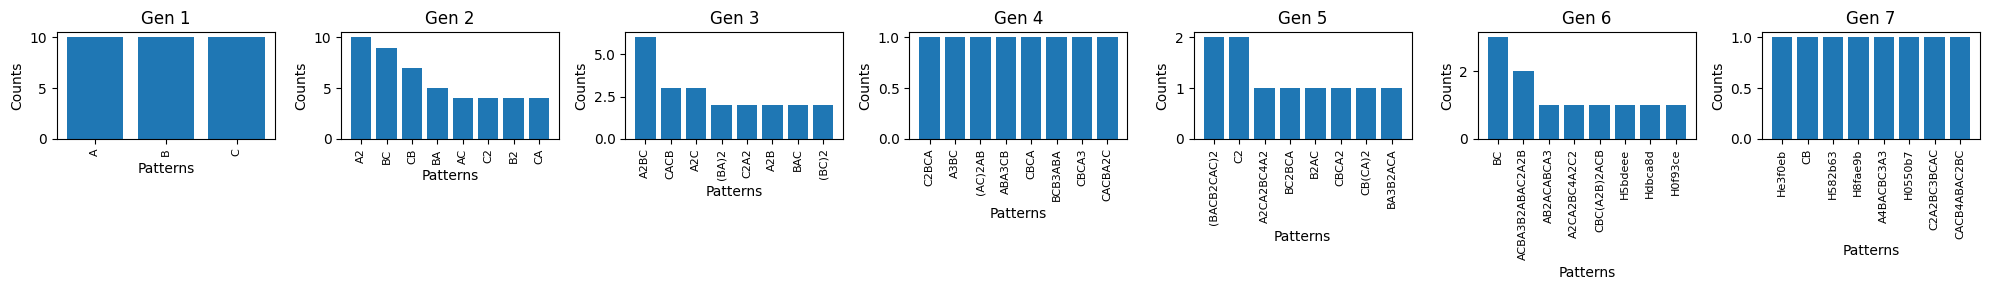

ABC System:


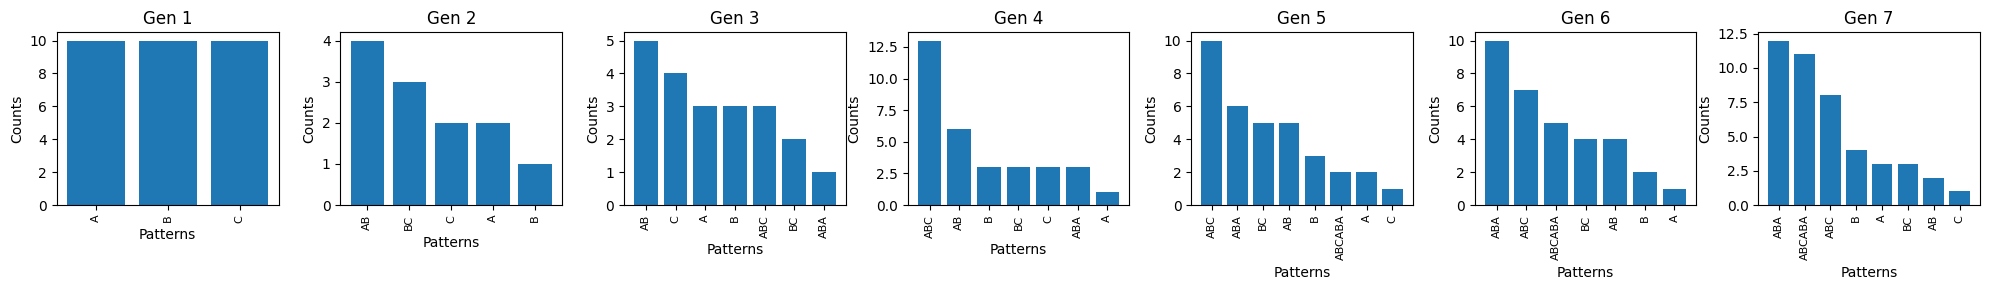


Final Results:
Unconstrained System: {'BBACBACBBCACBACBBCACCAABCCCBCABCCBCABBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'CACBAAABBABACCAABBBBAABACCCAAABAABACBCBCBCBABABAAAABAABC': 1, 'ABBBAABACCCAAABAABACBABBACABCAAA': 1, 'BCBCCCAAAABCCACBBCBBBABABACAABCCCBCABCCBCABBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'CABAABACBABBCAABAABACB': 1, 'CCCABABAAAABAABCBCBCBABAAACB': 1, 'AA': 2, 'BBCAABAABACBAAABACBCCCAAABAABACBCCABABAAAABAABCBCBCBABAAACB': 1, 'AAAABACBCCCAAAC': 2, 'CAABCCCBCAAACAABCCCCAABACABCAACCBCBCCBCAA': 1, 'BACBAAABBABACCAABABAABACBABC': 1, 'CCABABAAAABAABCBCBCBABAAACBA': 1, 'BBBAABACCCAAABAABACBABBACABCAAACACBAAABBABACCAAB': 1, 'CCAABCCCBCACA': 1, 'BA': 1, 'CACBBBBABACCBCBBCAABAABACBAAABACBCCCAAABAABACB': 1, 'BBBBAABACCCAAABAABACBCBCBCBABABAAAABAABC': 1, 'AAAABACBCCCAABCAABAABACBCACBBBBABACCABABAAAABAABCBCBCBABAAACB': 1, 'BBCBCAABABABBCBABAACCCACBAAABABBAC': 1, 'BBBACBACBBCACBACBBCACCAABCCCBCABCCBCA': 1, 'BBBAABACCCAAABAABACBBACBBCACBABABBCAABCCACBAC': 1, 'CCACBBBBABACCB': 1, 'BBCCC

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simulate_case(num_generations, interactions_per_generation, regeneration_rate, initial_population, stability=None):
    """
    Simulate a system with interactions and optional stability rules.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.
        stability (dict): Stability values for compounds (optional).

    Returns:
        dict: Final population counts for the last generation.
    """
    population = initial_population.copy()

    fig, axes = plt.subplots(1, num_generations, figsize=(20, 3))
    axes = axes.flatten()

    for generation in range(num_generations):
        # Count and plot top patterns
        population_count = Counter(population)
        top_patterns = population_count.most_common(8)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        labels = compact_symbols(dict(top_patterns)).keys()
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Gen {generation + 1}")
        ax.set_xlabel("Patterns")
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=90, fontsize=8)
        ax.set_ylabel("Counts")

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
#           symbol1, symbol2 = random.sample(population, 2)
            symbol1, symbol2 = random.choices(population, k=2)
            compound = "".join(symbol1 + symbol2)
            if stability is None or compound in stability:
                new_population.append(compound)
            else:
                # If the compound is invalid, add the original symbols back
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if stability is None or random.random() < (stability.get(compound, 1) / max(stability.values())):
                aged_population.append(compound)
        population = aged_population

    # Hide unused subplot axes
    for i in range(num_generations, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

    # Return the final population counts
    return dict(Counter(population))


# Parameters for the simulations
num_generations = 7
interactions_per_generation = 50
regeneration_rate = {"A": 5, "B": 5, "C": 5}
initial_population = ["A", "B", "C"] * 10

# Stability values for the ABC system
abc_stability = {
    "AB": 3, "BC": 3, "ABC": 5, "ABA": 6, "ABCABA":8,  # High stability for specific compounds
    "AC": 1, "A": 1, "B": 2, "C": 1  # Lower stability for others
}

# Run the unconstrained simulation (no stability rules)
print("Unconstrained System:")
unrestricted_results = simulate_case(
    num_generations, interactions_per_generation, regeneration_rate, initial_population
)

# Run the ABC system simulation (with stability rules)
print("ABC System:")
stability_results = simulate_case(
    num_generations, interactions_per_generation, regeneration_rate, initial_population, abc_stability
)

# Print final results
print("\nFinal Results:")
print("Unconstrained System:", unrestricted_results)
print("ABC System:", stability_results)


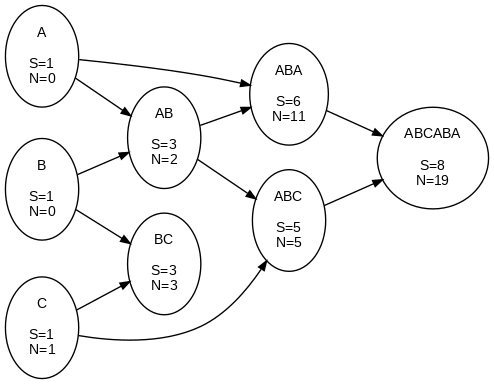

In [ ]:
# Write the graph definition to a DOT file
dot_content = """
digraph ABC_System {
    rankdir=LR;
    size="6,4!";
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=10, fontname="Arial"];
    edge [color=black, arrowsize=0.7];

    // Base elements to intermediate patterns
    A [label="A\n\nS=1\nN=0"];
    B [label="B\n\nS=1\nN=0"];
    C [label="C\n\nS=1\nN=1"];
    AB [label="AB\n\nS=3\nN=2"];
    BC [label="BC\n\nS=3\nN=3"];
    ABC [label="ABC\n\nS=5\nN=5"];
    ABA [label="ABA\n\nS=6\nN=11"];
    ABCABA [label="ABCABA\n\nS=8\nN=19"];

    // Intermediates to final patterns
    A -> AB;
    B -> AB;
    B -> BC;
    C -> BC;

    // Intermediate patterns to final patterns
    AB -> ABC;
    C -> ABC;
    AB -> ABA;
    A -> ABA;
    ABA -> ABCABA;
    ABC -> ABCABA;
}
"""

# Write the DOT content to a file
with open("abc_system.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_system.dot > abc_system.png

# Display the rendered image
from IPython.display import Image
Image('abc_system.png')


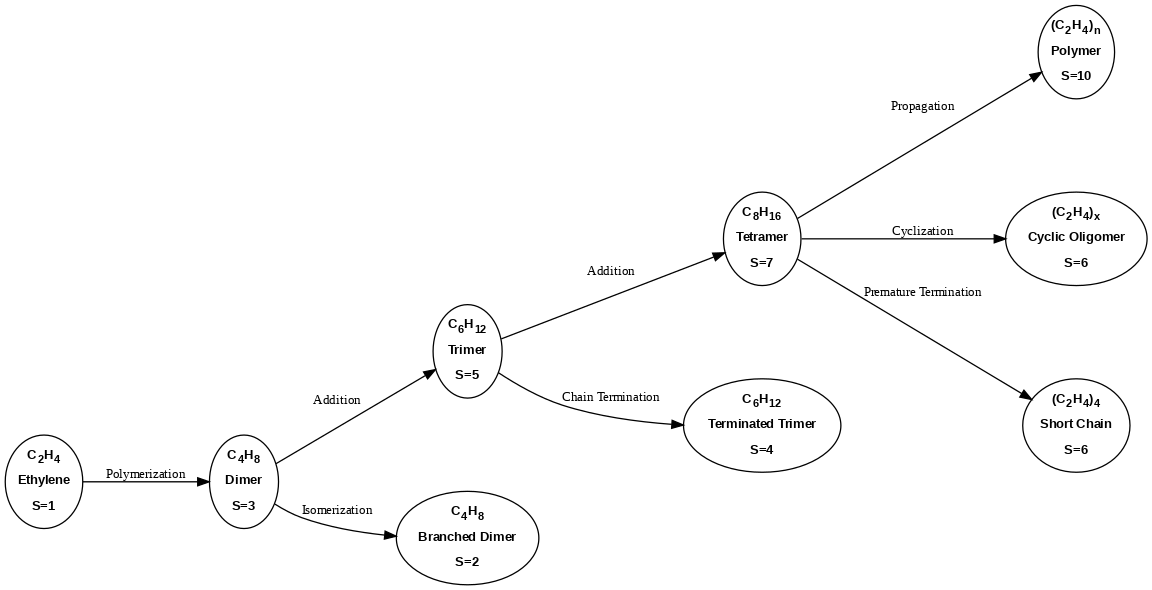

In [ ]:
dot_content = """
digraph Polymerization_Evolution {
    rankdir=LR;
    size="12,7!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=10, fontname="Arial Bold", margin=0.01];
    edge [color=black, arrowsize=0.9, fontsize=10];

    // Base elements and intermediates
    Ethylene [label=<C<sub>2</sub>H<sub>4</sub><br/><br/>Ethylene<br/><br/>S=1>];
    Dimer [label=<C<sub>4</sub>H<sub>8</sub><br/><br/>Dimer<br/><br/>S=3>];
    Trimer [label=<C<sub>6</sub>H<sub>12</sub><br/><br/>Trimer<br/><br/>S=5>];
    Tetramer [label=<C<sub>8</sub>H<sub>16</sub><br/><br/>Tetramer<br/><br/>S=7>];
    Polymer [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>n</sub><br/><br/>Polymer<br/><br/>S=10>];

    // Less stable by-products
    Branched_Dimer [label=<C<sub>4</sub>H<sub>8</sub><br/><br/>Branched Dimer<br/><br/>S=2>];
    Terminated_Trimer [label=<C<sub>6</sub>H<sub>12</sub><br/><br/>Terminated Trimer<br/><br/>S=4>];
    Cyclic_Oligomer [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>x</sub><br/><br/>Cyclic Oligomer<br/><br/>S=6>];
    Short_Chain [label=<(C<sub>2</sub>H<sub>4</sub>)<sub>4</sub><br/><br/>Short Chain<br/><br/>S=6>];

    // Main reaction pathway
    Ethylene -> Dimer [label="Polymerization"];
    Dimer -> Trimer [label="Addition"];
    Trimer -> Tetramer [label="Addition"];
    Tetramer -> Polymer [label="Propagation"];

    // Less stable reaction pathways
    Dimer -> Branched_Dimer [label="Isomerization"];
    Trimer -> Terminated_Trimer [label="Chain Termination"];
    Tetramer -> Cyclic_Oligomer [label="Cyclization"];
    Tetramer -> Short_Chain [label="Premature Termination"];
}

"""

# Write the DOT content to a file
with open("abc_poly.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_poly.dot > abc_poly.png

# Display the rendered image
from IPython.display import Image
Image('abc_poly.png')



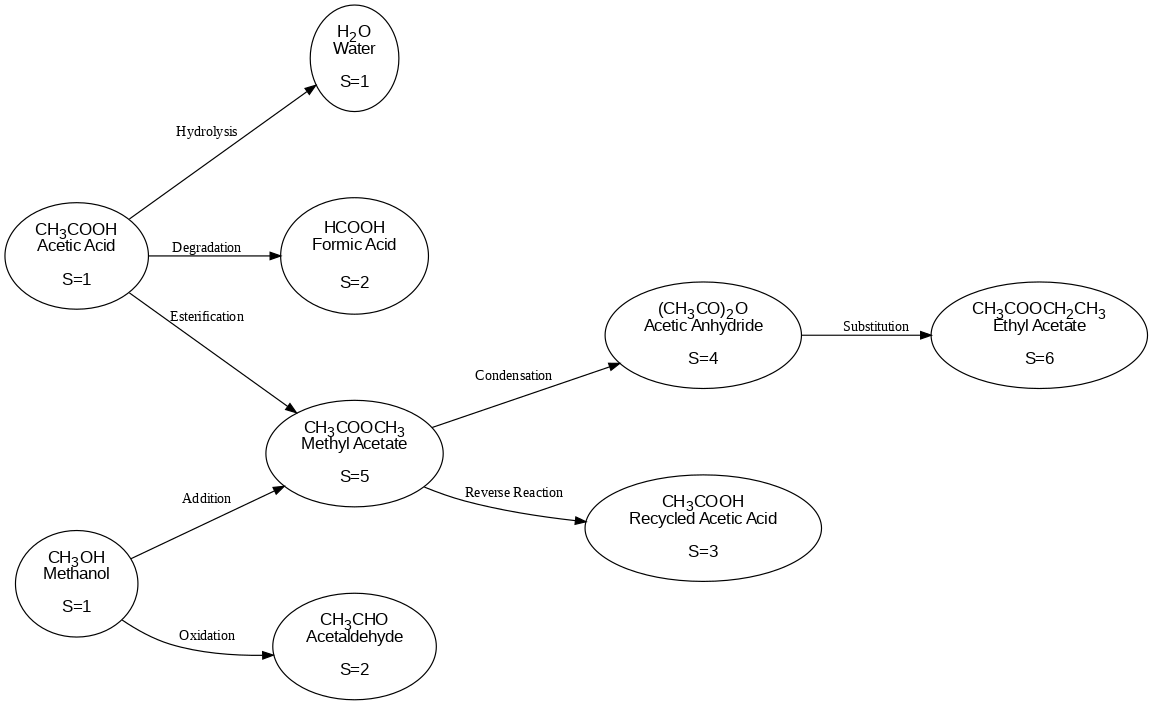

In [ ]:
dot_content = """
digraph Esterification_Hydrolysis {
    rankdir=LR;
    size="12,10!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base molecules and intermediates
    Acetic_Acid [label=<CH<sub>3</sub>COOH<br/>Acetic Acid<br/><br/>S=1>];
    Methanol [label=<CH<sub>3</sub>OH<br/>Methanol<br/><br/>S=1>];
    Methyl_Acetate [label=<CH<sub>3</sub>COOCH<sub>3</sub><br/>Methyl Acetate<br/><br/>S=5>];
    Acetic_Anhydride [label=<(CH<sub>3</sub>CO)<sub>2</sub>O<br/>Acetic Anhydride<br/><br/>S=4>];
    Ethyl_Acetate [label=<CH<sub>3</sub>COOCH<sub>2</sub>CH<sub>3</sub><br/>Ethyl Acetate<br/><br/>S=6>];

    // By-products
    Water [label=<H<sub>2</sub>O<br/>Water<br/><br/>S=1>];
    Formic_Acid [label=<HCOOH<br/>Formic Acid<br/><br/>S=2>];
    Acetaldehyde [label=<CH<sub>3</sub>CHO<br/>Acetaldehyde<br/><br/>S=2>];
    Acetic_Acid_Regen [label=<CH<sub>3</sub>COOH<br/>Recycled Acetic Acid<br/><br/>S=3>];

    // Main reaction pathway
    Acetic_Acid -> Methyl_Acetate [label="Esterification"];
    Methanol -> Methyl_Acetate [label="Addition"];
    Methyl_Acetate -> Acetic_Anhydride [label="Condensation"];
    Acetic_Anhydride -> Ethyl_Acetate [label="Substitution"];

    // Side reactions
    Acetic_Acid -> Water [label="Hydrolysis"];
    Acetic_Acid -> Formic_Acid [label="Degradation"];
    Methanol -> Acetaldehyde [label="Oxidation"];
    Methyl_Acetate -> Acetic_Acid_Regen [label="Reverse Reaction"];
}


"""

# Write the DOT content to a file
with open("abc_hydro.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_hydro.dot > abc_hydro.png

# Display the rendered image
from IPython.display import Image
Image('abc_hydro.png')


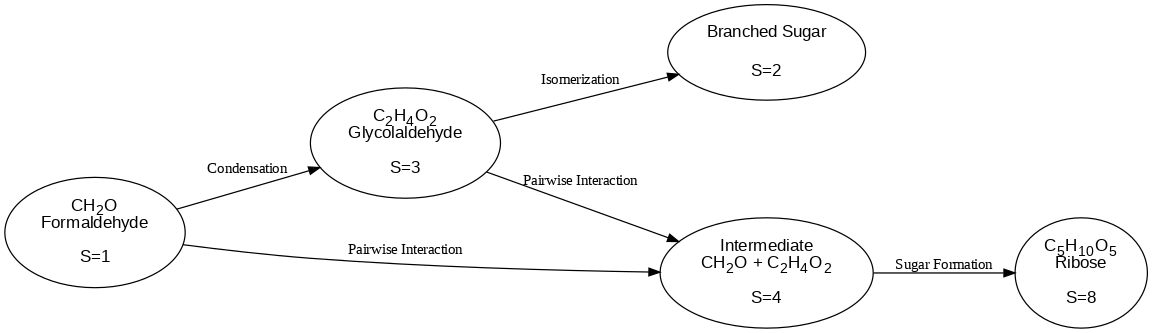

In [9]:
dot_content = """
digraph RNA_Precursor_Evolution {
    rankdir=LR;
    size="12,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Main pathway molecules
    Formaldehyde [label=<CH<sub>2</sub>O<br/>Formaldehyde<br/><br/>S=1>];
    Glycolaldehyde [label=<C<sub>2</sub>H<sub>4</sub>O<sub>2</sub><br/>Glycolaldehyde<br/><br/>S=3>];
    Ribose [label=<C<sub>5</sub>H<sub>10</sub>O<sub>5</sub><br/>Ribose<br/><br/>S=8>];

    // Pairwise intermediate nodes
    Formaldehyde_Glycol [label=<Intermediate<br/>CH<sub>2</sub>O + C<sub>2</sub>H<sub>4</sub>O<sub>2</sub><br/><br/>S=4>];

    // Main reaction pathway
    Formaldehyde -> Glycolaldehyde [label="Condensation"];
    Formaldehyde -> Formaldehyde_Glycol [label="Pairwise Interaction"];
    Glycolaldehyde -> Formaldehyde_Glycol [label="Pairwise Interaction"];
    Formaldehyde_Glycol -> Ribose [label="Sugar Formation"];

    // Key less stable intermediates
    Branched_Sugar [label=<Branched Sugar<br/><br/>S=2>];

    // Side reactions
    Glycolaldehyde -> Branched_Sugar [label="Isomerization"];
}





"""

# Write the DOT content to a file
with open("abc_prerna.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_prerna.dot > abc_prerna.png

# Display the rendered image
from IPython.display import Image
Image('abc_prerna.png')


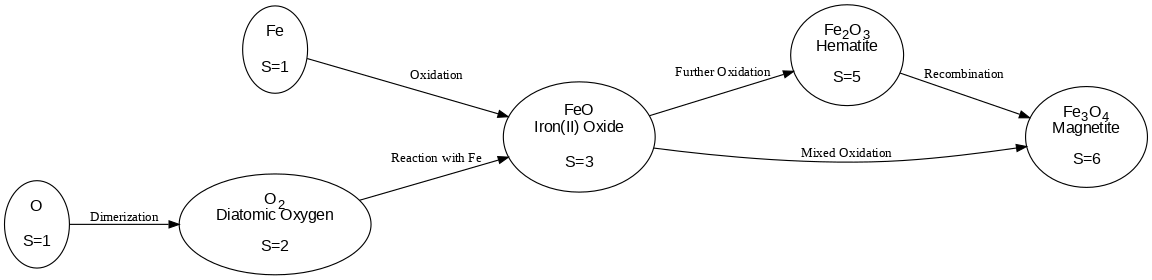

In [2]:
dot_content = """
digraph Iron_Oxide_Evolution {
    rankdir=LR;
    size="12,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base elements
    Fe [label=<Fe<br/><br/>S=1>];
    O [label=<O<br/><br/>S=1>];

    // Intermediates
    O2 [label=<O<sub>2</sub><br/>Diatomic Oxygen<br/><br/>S=2>];
    FeO [label=<FeO<br/>Iron(II) Oxide<br/><br/>S=3>];
    Fe2O3 [label=<Fe<sub>2</sub>O<sub>3</sub><br/>Hematite<br/><br/>S=5>];
    Fe3O4 [label=<Fe<sub>3</sub>O<sub>4</sub><br/>Magnetite<br/><br/>S=6>];

    // Base reactions
    Fe -> FeO [label="Oxidation"];
    O -> O2 [label="Dimerization"];

    // Intermediate reactions
    O2 -> FeO [label="Reaction with Fe"];
    FeO -> Fe2O3 [label="Further Oxidation"];
    FeO -> Fe3O4 [label="Mixed Oxidation"];

    // Final pathways
    Fe2O3 -> Fe3O4 [label="Recombination"];
}



"""

# Write the DOT content to a file
with open("abc_oxi.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_oxi.dot > abc_oxi.png

# Display the rendered image
from IPython.display import Image
Image('abc_oxi.png')


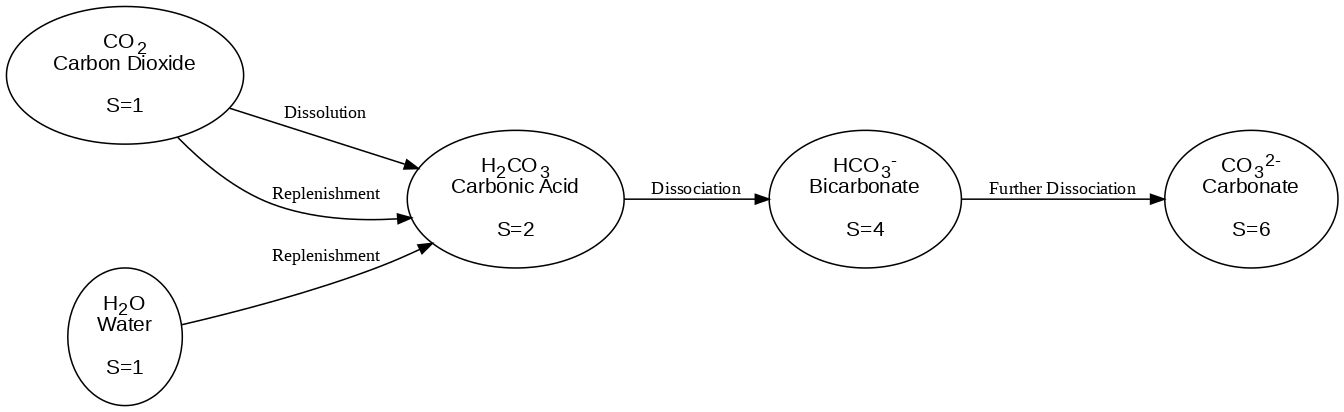

In [6]:
dot_content = """
digraph Carbonate_Formation {
    rankdir=LR;
    size="14,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Nodes representing compounds
    CO2 [label=<CO<sub>2</sub><br/>Carbon Dioxide<br/><br/>S=1>];
    H2O [label=<H<sub>2</sub>O<br/>Water<br/><br/>S=1>];
    H2CO3 [label=<H<sub>2</sub>CO<sub>3</sub><br/>Carbonic Acid<br/><br/>S=2>];
    HCO3 [label=<HCO<sub>3</sub><sup>-</sup><br/>Bicarbonate<br/><br/>S=4>];
    CO3 [label=<CO<sub>3</sub><sup>2-</sup><br/>Carbonate<br/><br/>S=6>];

    // Main reaction pathway
    CO2 -> H2CO3 [label="Dissolution"];
    H2CO3 -> HCO3 [label="Dissociation"];
    HCO3 -> CO3 [label="Further Dissociation"];

    // Input and replenishment
    CO2 -> H2CO3 [label="Replenishment"];
    H2O -> H2CO3 [label="Replenishment"];
}

"""

#Write the DOT content to a file
with open("abc_carb.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_carb.dot > abc_carb.png

# Display the rendered image
from IPython.display import Image
Image('abc_carb.png')

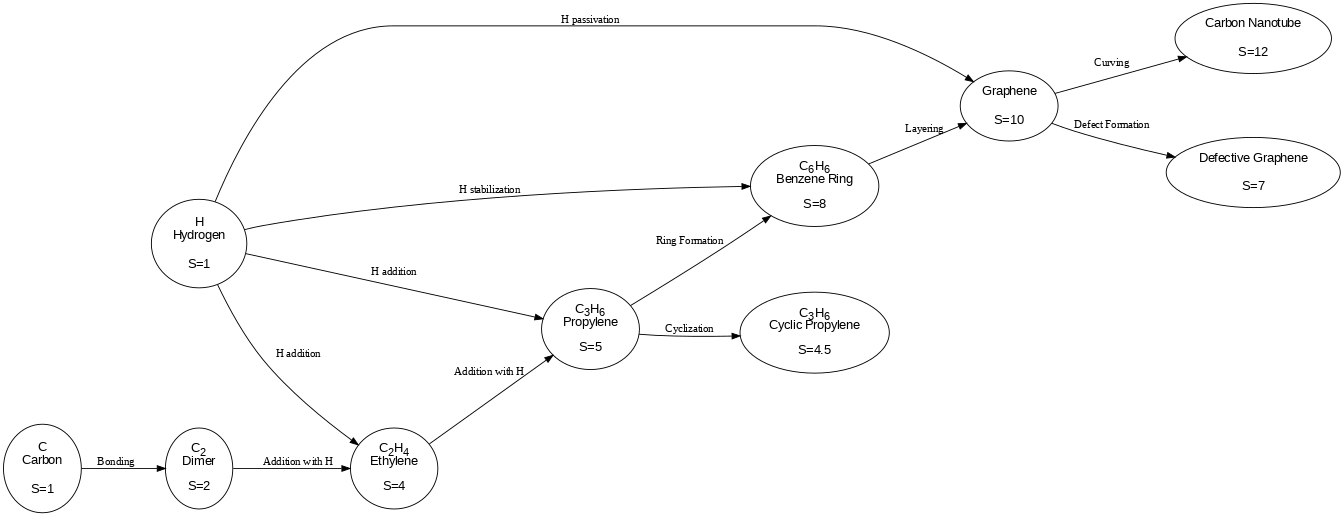

In [ ]:
dot_content = """
digraph Nanostructure_Assembly {
    rankdir=LR;
    size="14,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base elements and intermediates
    C [label=<C<br/>Carbon<br/><br/>S=1>];
    H [label=<H<br/>Hydrogen<br/><br/>S=1>];
    C2 [label=<C<sub>2</sub><br/>Dimer<br/><br/>S=2>];
    C2H4 [label=<C<sub>2</sub>H<sub>4</sub><br/>Ethylene<br/><br/>S=4>];
    C3H6 [label=<C<sub>3</sub>H<sub>6</sub><br/>Propylene<br/><br/>S=5>];
    Benzene [label=<C<sub>6</sub>H<sub>6</sub><br/>Benzene Ring<br/><br/>S=8>];
    Graphene [label=<Graphene<br/><br/>S=10>];
    Nanotube [label=<Carbon Nanotube<br/><br/>S=12>];

    // Less stable intermediates
    Cyclic_C3H6 [label=<C<sub>3</sub>H<sub>6</sub><br/>Cyclic Propylene<br/><br/>S=4.5>];
    Defective_Graphene [label=<Defective Graphene<br/><br/>S=7>];

    // Main reaction pathway
    C -> C2 [label="Bonding"];
    C2 -> C2H4 [label="Addition with H"];
    C2H4 -> C3H6 [label="Addition with H"];
    C3H6 -> Benzene [label="Ring Formation"];
    Benzene -> Graphene [label="Layering"];
    Graphene -> Nanotube [label="Curving"];

    // Hydrogen flow connections
    H -> C2H4 [label="H addition"];
    H -> C3H6 [label="H addition"];
    H -> Benzene [label="H stabilization"];
    H -> Graphene [label="H passivation"];

    // Less stable pathways
    C3H6 -> Cyclic_C3H6 [label="Cyclization"];
    Graphene -> Defective_Graphene [label="Defect Formation"];
}






"""


# Write the DOT content to a file
with open("abc_nano.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_nano.dot > abc_nano.png

# Display the rendered image
from IPython.display import Image
Image('abc_nano.png')

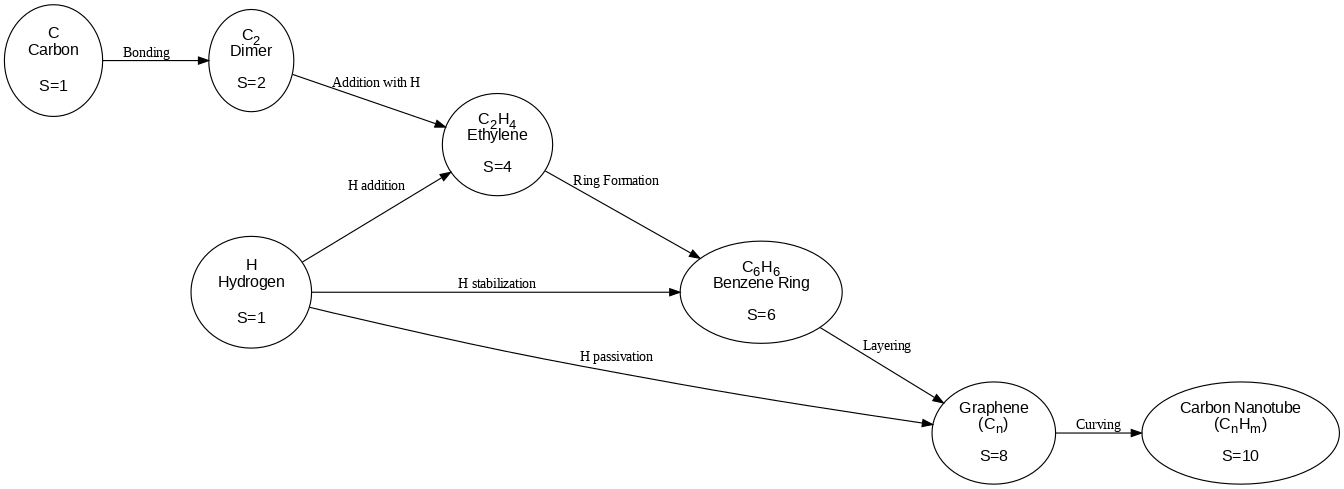

In [4]:
import graphviz

# Define the DOT graph content
dot_content = """
digraph Simplified_Nanostructure_Assembly {
    rankdir=LR;
    size="14,8!";
    nodesep=1.0;
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=14, fontname="Arial"];
    edge [color=black, arrowsize=0.9, fontsize=12];

    // Base elements and intermediates
    C [label=<C<br/>Carbon<br/><br/>S=1>];
    H [label=<H<br/>Hydrogen<br/><br/>S=1>];
    C2 [label=<C<sub>2</sub><br/>Dimer<br/><br/>S=2>];
    C2H4 [label=<C<sub>2</sub>H<sub>4</sub><br/>Ethylene<br/><br/>S=4>];
    Benzene [label=<C<sub>6</sub>H<sub>6</sub><br/>Benzene Ring<br/><br/>S=6>];
    Graphene [label=<Graphene<br/>(C<sub>n</sub>)<br/><br/>S=8>];
    Nanotube [label=<Carbon Nanotube<br/>(C<sub>n</sub>H<sub>m</sub>)<br/><br/>S=10>];

    // Main reaction pathway
    C -> C2 [label="Bonding"];
    C2 -> C2H4 [label="Addition with H"];
    C2H4 -> Benzene [label="Ring Formation"];
    Benzene -> Graphene [label="Layering"];
    Graphene -> Nanotube [label="Curving"];

    // Hydrogen flow connections
    H -> C2H4 [label="H addition"];
    H -> Benzene [label="H stabilization"];
    H -> Graphene [label="H passivation"];
}
"""

# Write the DOT content to a file
with open("abc_nano.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_nano.dot > abc_nano.png

# Display the rendered image
from IPython.display import Image
Image('abc_nano.png')

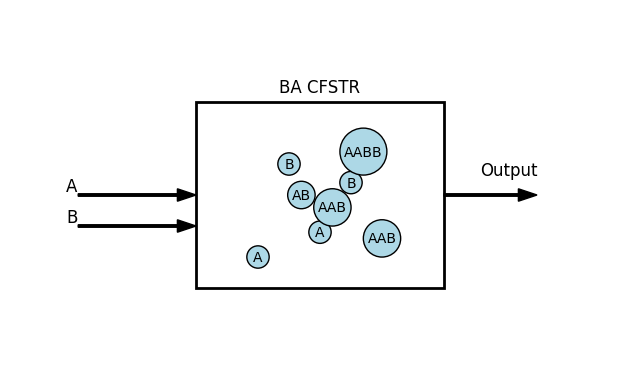

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_ba_cfstr_figure():
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')

    # Tank rectangle (the CFSTR)
    tank_left, tank_bottom = 3, 1.5
    tank_width, tank_height = 4, 3
    tank = patches.Rectangle((tank_left, tank_bottom), tank_width, tank_height,
                             linewidth=2, edgecolor='black', facecolor='white')
    ax.add_patch(tank)

    # Label the "Tank"
    ax.text(tank_left + tank_width/2, tank_bottom + tank_height + 0.1,
            "BA CFSTR", fontsize=12, ha='center', va='bottom')

    # Inputs on the left (arrows labeled "A" and "B")
    # We'll draw them as arrow lines pointing into the tank
    ax.arrow(1.1, 3.0, 1.9, 0.0, width=0.04,
             head_width=0.2, head_length=0.3,
             length_includes_head=True, color='black')
    ax.text(1, 3, "A", fontsize=12, ha='center', va='bottom')

    ax.arrow(1.1, 2.5, 1.9, 0.0, width=0.04,
             head_width=0.2, head_length=0.3,
             length_includes_head=True, color='black')
    ax.text(1.0, 2.5, "B", fontsize=12, ha='center', va='bottom')

    # Output arrow on the right
    # We'll have it come out from the middle of the tank's right boundary
    ax.arrow(tank_left + tank_width, tank_bottom + tank_height/2,
             1.5, 0.0, width=0.04,
             head_width=0.2, head_length=0.3,
             length_includes_head=True, color='black')
    ax.text(tank_left + tank_width + 1.05, tank_bottom + tank_height/2 + 0.25,
            "Output", fontsize=12, ha='center', va='bottom')

    # Place “floating” elements/compounds inside the tank
    # We'll position them roughly in a grid or random arrangement.
    # Adjust coordinates as needed for clarity.

    inside_positions = [
        (4.0, 2.0),  # A
        (4.5, 3.5),  # B
        (5.0, 2.4),  # A
        (5.5, 3.2),  # B
        (5.2, 2.8),  # AAB
        (6.0, 2.3),  # AAB
        (4.7, 3.0),  # AB
        (5.7, 3.7),  # AABB
    ]

    labels = [
        "A",
        "B",
        "A",
        "B",
        "AAB",
        "AAB",
        "AB",
        "AABB"
    ]

    for (xx, yy), lab in zip(inside_positions, labels):
        ax.text(xx, yy, lab, fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle="circle,pad=0.3", fc="lightblue", ec="black", lw=1))

    plt.show()

# Call the function to produce and display the figure
draw_ba_cfstr_figure()


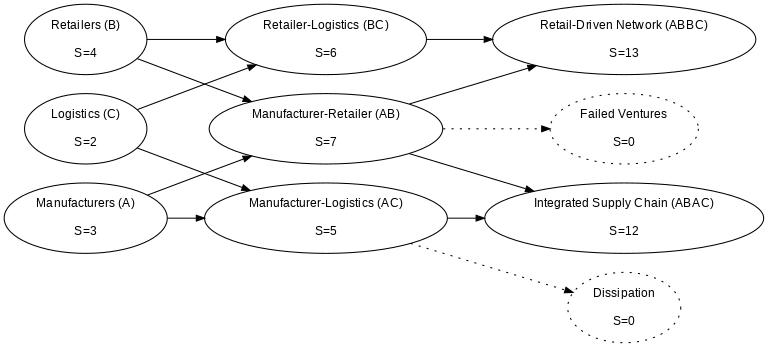

In [1]:
dot_content = """
digraph BA_Ecosystem {
    rankdir=LR;
    size="8,6!";
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=12, fontname="Arial"];
    edge [color=black, arrowsize=0.8, fontsize=10];

    // Base elements
    A [label="Manufacturers (A)\n\nS=3"];
    B [label="Retailers (B)\n\nS=4"];
    C [label="Logistics (C)\n\nS=2"];

    // Stage 1 Nodes
    AB [label="Manufacturer-Retailer (AB)\n\nS=7"];
    AC [label="Manufacturer-Logistics (AC)\n\nS=5"];
    BC [label="Retailer-Logistics (BC)\n\nS=6"];
    Failed [label="Failed Ventures\n\nS=0", fillcolor=gray, style=dotted];

    // Stage 2 Nodes
    ABAC [label="Integrated Supply Chain (ABAC)\n\nS=12"];
    ABBC [label="Retail-Driven Network (ABBC)\n\nS=13"];
    Dissipate [label="Dissipation\n\nS=0", fillcolor=gray, style=dotted];

    // Connections
    A -> AB;
    B -> AB;
    A -> AC;
    C -> AC;
    B -> BC;
    C -> BC;

    AB -> ABAC;
    AC -> ABAC;
    AB -> ABBC;
    BC -> ABBC;

    AB -> Failed [style=dotted];
    AC -> Dissipate [style=dotted];
}

"""


# Write the DOT content to a file
with open("abc_eco.dot", "w") as file:
    file.write(dot_content)

# Install Graphviz and render the DOT file to PNG
!apt -qqq install graphviz
!dot -Tpng abc_eco.dot > abc_eco.png

# Display the rendered image
from IPython.display import Image
Image('abc_eco.png')

Graph has been generated and saved as 'ba_ecosystem.png'.


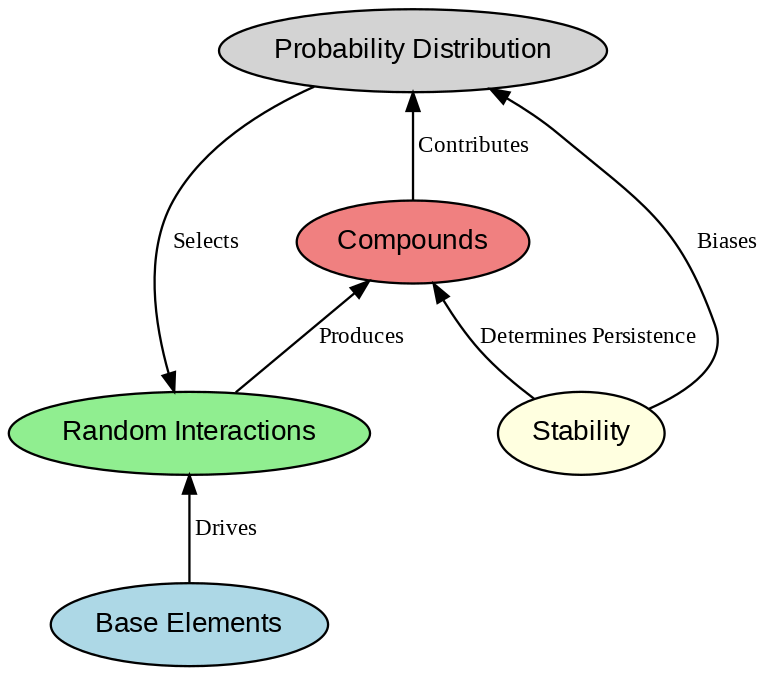

In [38]:
from graphviz import Digraph

dot_content = """
digraph BA_Ecosystem {
    rankdir=BT; // Bottom-To-Top layout
    size="8,8!"; // Adjust the canvas size
    ranksep=0.5; // Vertical spacing between ranks
    nodesep=0.7; // Horizontal spacing between nodes
    node [shape=ellipse, style=filled, fillcolor=white, fontsize=12, fontname="Arial"];
    edge [color=black, arrowsize=0.8, fontsize=10];

    // Nodes
    BaseElements [label="Base Elements", fillcolor=lightblue];
    RandomInteractions [label="Random Interactions", fillcolor=lightgreen];
    Compounds [label="Compounds", fillcolor=lightcoral];
    Stability [label="Stability", fillcolor=lightyellow];
    ProbDist [label="Probability Distribution", fillcolor=lightgray];

    // Edges
    BaseElements -> RandomInteractions [label=" Drives"];
    RandomInteractions -> Compounds [label=" Produces"];
    Stability -> Compounds [label="Determines Persistence"];
    Stability -> ProbDist [label="Biases"];
    ProbDist -> RandomInteractions [label="Selects"];
    Compounds -> ProbDist [label=" Contributes"];
}
"""


# Render the graph
graph = Source(dot_content)
graph.render("ba_ecosystem", format="png", cleanup=True)
print("Graph has been generated and saved as 'ba_ecosystem.png'.")

# Display the rendered image
from IPython.display import Image
Image('ba_ecosystem.png')

